In [487]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [488]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [489]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func


In [490]:
# create engine to hawaii.sqlite
engine = create_engine(f"sqlite:///{database_path}")


In [491]:
# reflect an existing database into a new model
session = Session(engine)

Base =  automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [492]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [527]:
# Save references to each table
Measurement = Base.classes.measurement

Station = Base.classes.station

In [528]:
# Create our session (link) from Python to the DB
conn = engine.connect()

pd.read_sql("SELECT * FROM Measurement", conn)

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


# Exploratory Precipitation Analysis

In [529]:
df1 = pd.read_sql("SELECT * FROM Measurement", conn)

df2 = pd.read_sql("SELECT * FROM Station", conn)

# Find the most recent date in the data set.
df1['date'] = pd.to_datetime(df1.date)

most_recent_date = df1['date'].max()

print(most_recent_date)

2017-08-23 00:00:00


In [530]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
start_date = '2016-08-23'
end_date = '2017-08-23'

mask = (df1['date'] > start_date) & (df1['date'] <= end_date)

df1 = df1.loc[mask]

df1


,id,station,date,prcp,tobs
2364,2365,USC00519397,2016-08-24,0.08,79.0
2365,2366,USC00519397,2016-08-25,0.08,80.0
2366,2367,USC00519397,2016-08-26,0.00,79.0
2367,2368,USC00519397,2016-08-27,0.00,77.0
2368,2369,USC00519397,2016-08-28,0.01,78.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


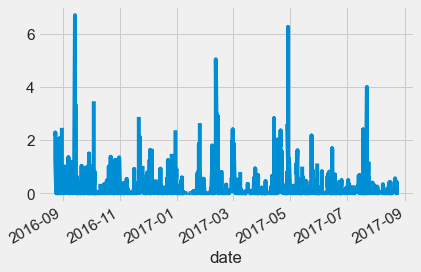

In [531]:
df1.set_index('date')

dates_df = df1.set_index('date')['prcp'].plot();


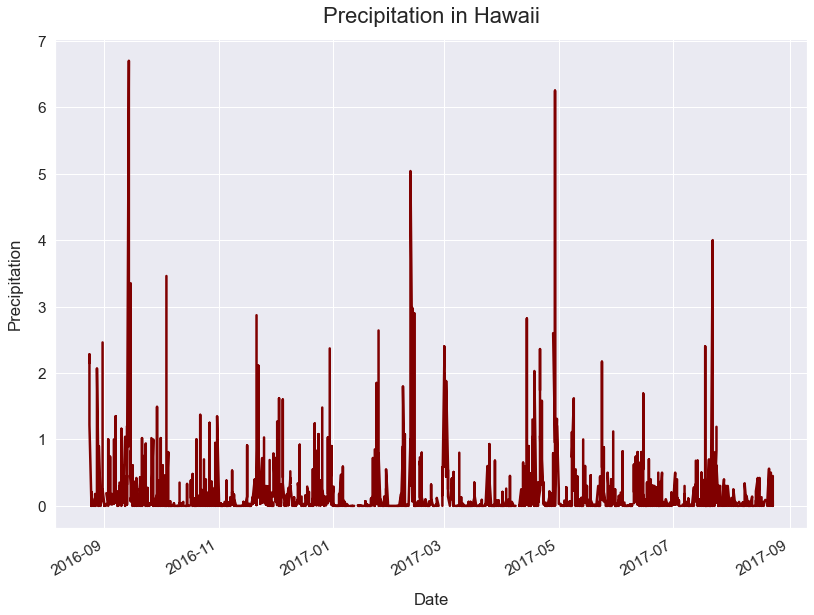

In [556]:
# Use Pandas Plotting with Matplotlib to plot the data
sns.set(font_scale=1.4)
dates_df = df1.set_index('date')['prcp'].plot(figsize=(12, 10), linewidth=2.5, color='maroon')
plt.xlabel("Date", labelpad=15)
plt.ylabel("Precipitation", labelpad=15)
plt.title("Precipitation in Hawaii", y=1.02, fontsize=22);

plt.savefig("Graph/precipitation.png")

In [533]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df1["prcp"].mean()

0.1764615384615388

In [534]:
df1["prcp"].median()

0.02

In [535]:
df1.agg(
{"prcp": ["min", "max", "median", "skew"],
}
)

,prcp
min,0.000000
max,6.700000
median,0.020000
skew,5.890936


# Exploratory Station Analysis

In [536]:
pd.read_sql("SELECT * FROM Station", conn)

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [546]:
# Design a query to calculate the total number stations in the dataset
df2['station'].describe()

count               9
unique              9
top       USC00519397
freq                1
Name: station, dtype: object

In [547]:
data = session.query(Measurement.station, Station.station).all()
data

[('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00513117'),
 ('USC00519397', 'USC00514830'),
 ('USC00519397', 'USC00517948'),
 ('USC00519397', 'USC00518838'),
 ('USC00519397', 'USC00519523'),
 ('USC00519397', 'USC00519281'),
 ('USC00519397', 'USC00511918'),
 ('USC00519397', 'USC00516128'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00513117'),
 ('USC00519397', 'USC00514830'),
 ('USC00519397', 'USC00517948'),
 ('USC00519397', 'USC00518838'),
 ('USC00519397', 'USC00519523'),
 ('USC00519397', 'USC00519281'),
 ('USC00519397', 'USC00511918'),
 ('USC00519397', 'USC00516128'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00513117'),
 ('USC00519397', 'USC00514830'),
 ('USC00519397', 'USC00517948'),
 ('USC00519397', 'USC00518838'),
 ('USC00519397', 'USC00519523'),
 ('USC00519397', 'USC00519281'),
 ('USC00519397', 'USC00511918'),
 ('USC00519397', 'USC00516128'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00513117'),
 ('USC00519397', 'USC00514830'),
 ('USC0051

In [554]:
data = (
    session
    .query(Measurement.station, Station.station)
    .filter(Measurement.station == Station.station)
    .all()

)

data

[('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00519397'),
 ('USC0051

In [552]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
data['station'].describe()
# List the stations and the counts in descending order.


TypeError: list indices must be integers or slices, not str

In [550]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [551]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()